# Introduction

Like Perceptron Learning Algorithm (PLA), Support Vector Machine (SVM) purely works only when the data of 2 classes is linearly separable. Naturally, we also want SVM to be able to work with data that is nearly linearly separable like Logistic Regression does.

There are two cases where SVM is not effective or even does not work:

- Case 1: The data is still linearly separable as in *Figure 1a)* but there is a noise point of the red circle class that is too close to the blue square class. In this case, if we use pure SVM, it will create a very small margin. In addition, the classification line is too close to the blue square class and far from the red circle class. Meanwhile, if we sacrifice this noise point, we get a much better margin described by the dashed lines. Pure SVM is therefore also considered sensitive to noise.
- Case 2: The data is not linearly separable but is close to linearly separable as in *Figure 1b)*. In this case, if we use pure SVM, it is clear that the optimization problem is infeasible, meaning the feasible set is an empty set, so the SVM optimization problem becomes infeasible. However, if we sacrifice a bit of the points near the boundary between the two classes, we can still create a pretty good dividing line like the bold dashed line. The thin dashed support lines still help create a large margin for this classifier. For each point that falls on the other side of the corresponding support lines (or margins, or borders), we say that point falls into the unsafe zone. Note that the safe zones of the two classes are different, intersecting at the part between the two support lines.

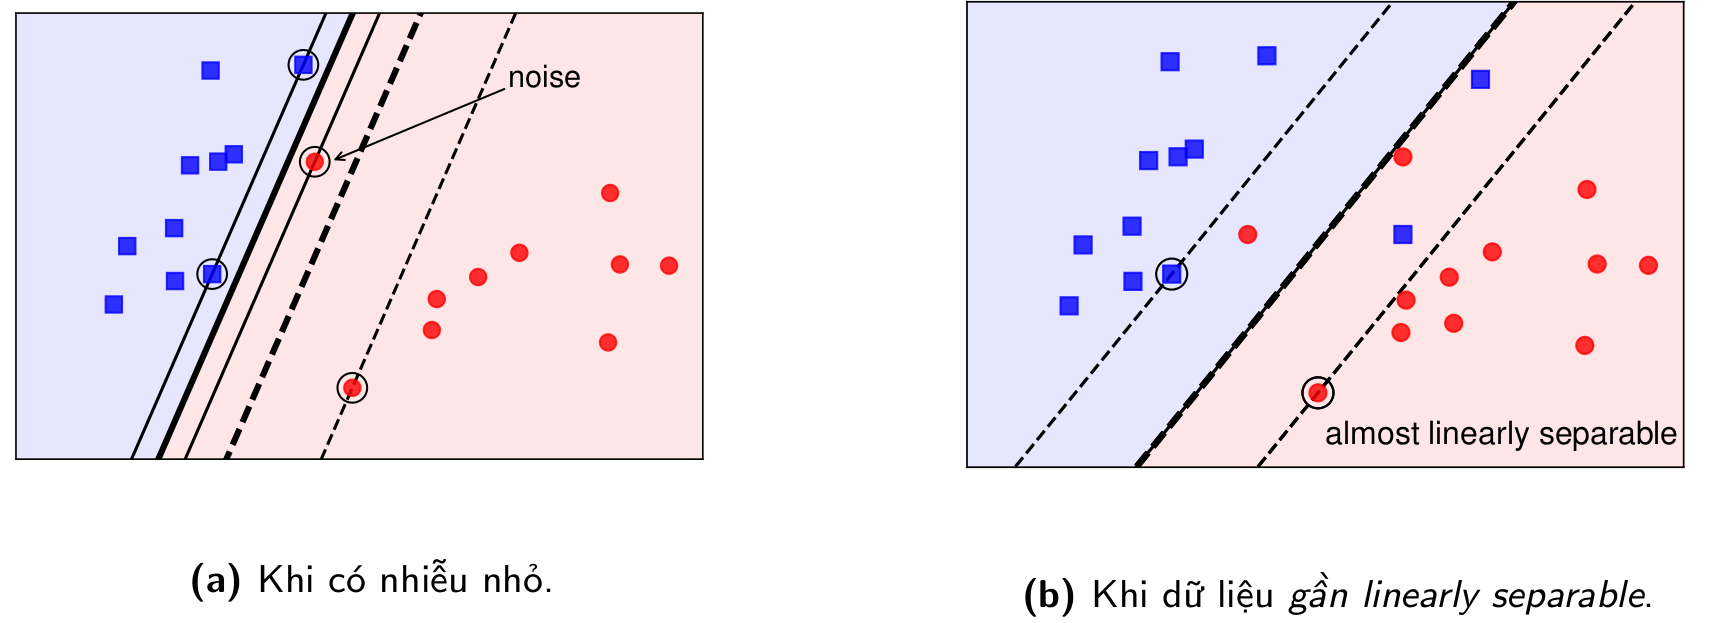

_Figure 1: There are two cases when pure support vector machines do not work well. (a) The two classes are still linearly separable, but a point in one class is too close to the other class, which may be noise. (b) The two-class data are not linearly separable, even though they are close to linearly separable_

In both cases, the margin created by the dividing line and the thin dashed line is also called soft-margin. To distinguish, pure SVM is also called hard-margin SVM. SVM that accepts some points in the training set as misclassified is called soft-margin SVM.

The optimization problem for Soft Margin SVM has two different approaches, both of which give interesting results and can be further developed into more complex and efficient SVM algorithms:

- The first approach is to solve a constrained optimization problem by solving a dual problem similar to Hard Margin SVM; this dual problem-based solution is the basis for the Kernel SVM method for real non-linearly separable data that I will discuss in the next post. This approach will be presented in Section 3 below.
- The second approach is to reduce it to an unconstrained optimization problem. This problem can be solved using Gradient Descent methods. This approach can therefore be applied to large scale problems. In addition, in this approach, we will be introduced to a new loss function called hinge loss. This loss function can be extended to the multi-class classification problem which I will discuss in 2 more posts (Multi-class SVM). The evolution from Soft Margin SVM to Multi-class SVM can be compared to the evolution from Logistic Regression to Softmax Regression.

# Mathematical Analysis

As mentioned above, to get a larger margin in Soft Margin SVM, we need to sacrifice some data points by accepting them to fall into the unsafe zone. Of course, we have to limit this sacrifice, otherwise, we can create a very large margin by sacrificing most of the points. So the objective function should be a combination of maximizing the margin and minimizing the sacrifice.

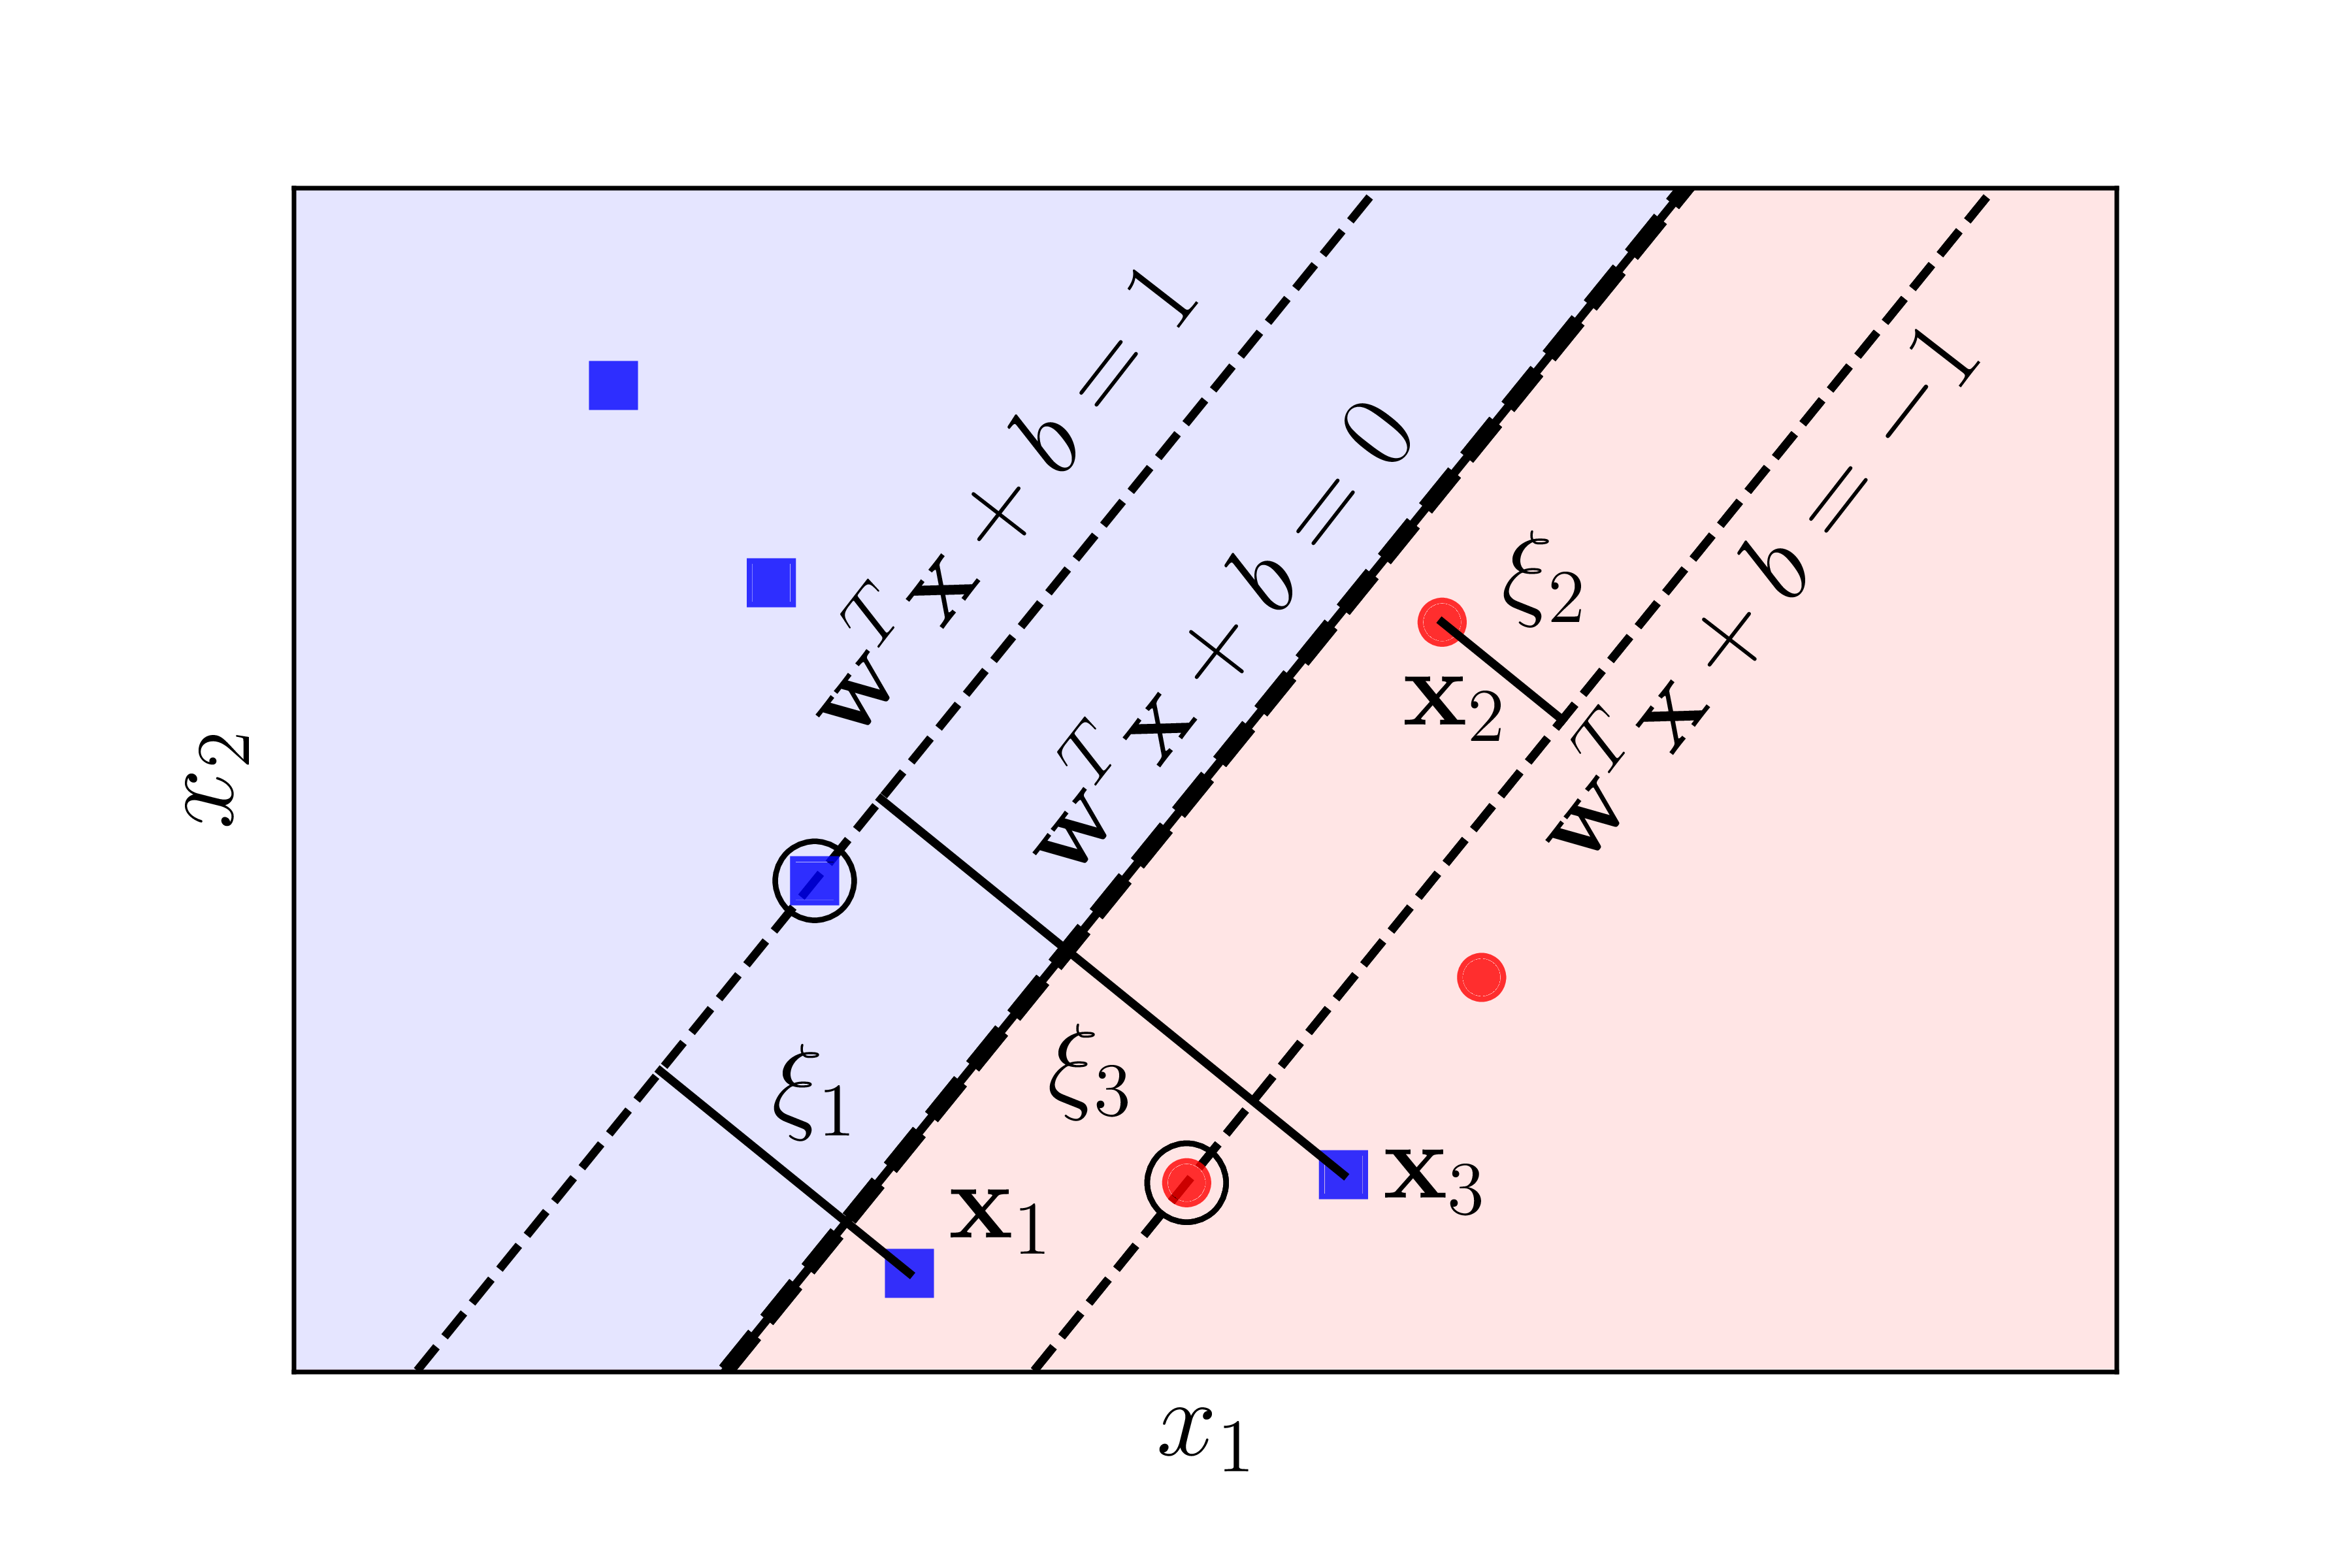

*Figure 2: Introduction to slack variables $\xi_i$. With each point lying in the safe region, $\xi = 0$. For points lying in the unsafe region, but are still on the right side of the boundary (bold dashed line), corresponding to $0 < \xi < 1$, $\mathbf{x}_2$ for example. The points lie in converse side of the boundary, corresponding to $\xi > 1$, $\mathbf{x}_1$ and $\mathbf{x}_3$ for example*

As with hard-margin SVM, maximizing the margin can lead to minimizing $||\mathbf{w}||_2^2$. To measure the sacrifice, consider *Figure 2*. For each point xn in the entire training set, we introduce a corresponding slack variable $\xi_n$. This variable is also called the slack variable. For points $||\mathbf{x}||_2^2$ that are in the safe region (that is, exactly on the corresponding background color and outside the margin), $\xi_n = 0$, meaning that no loss has occurred. For points that are in the unsafe region such as $\mathbf{x}_1, \mathbf{x}_2$ or $\mathbf{x}_3$, we need $\xi_i > 0$, meaning that loss has occurred. This quantity should be proportional to the distance from the corresponding violation point to the safe border. Note that if $y_i= \pm 1$ is the label of xi in the unsafe region, then $\xi_i$ can be defined as:

$$\xi_i = |\mathbf{w}^T\mathbf{x}_i + b - y_i|$$

Recall the optimization problem for Hard Margin SVM:

$$
\begin{align*}
    (\mathbf{w}, b) &= \arg \min_{\mathbf{w}, b} \frac{1}{2}{||\mathbf{w}||_2^2}   \newline
    \text{subject to:}~ & y_n(\mathbf{w}^T\mathbf{x}_n + b) \geq 1, \forall n = 1, 2, \dots, N \tag{1}
\end{align*}
$$

With soft-margin SVM, the objective function will have an additional term that helps to minimize the total sacrifice. From there we have the objective function:

$$\frac{1}{2}{||\mathbf{w}||_2^2} + C \sum_{n=1}^N \xi_n$$

where $C$ is a positive constant and $\xi = [\xi_1, \xi_2, \dots, \xi_N]$. The constant $C$ is used to adjust the importance between margin and sacrifice. This constant is pre-defined by the programmer or can be determined by cross-validation. 

The constraint is changed slightly. For each pair of data points $(\mathbf{x}_n, y_n)$, rather than strictly constraint as $y_n(\mathbf{w}^T\mathbf{x}_n + b) \geq 1$, we will have soft constraints:

$$y_n(\mathbf{w}^T\mathbf{x}_n + b) \geq 1 - \xi_n \Leftrightarrow 1 - \xi_n - y_n(\mathbf{w}^T\mathbf{x}_n + b) \leq 0, ~~ \forall n = 1, 2, \dots, n$$

with extra constraints $\xi_n \geq 0, ~\forall n = 1, 2, \dots, N$.

In summary, we will have the optimization problem in standard form for Soft-margin SVM:

$$
\begin{align*}
    (\mathbf{w}, b, \xi) &= \arg \min_{\mathbf{w}, b, \xi} \frac{1}{2}{||\mathbf{w}||_2^2} + C \sum_{n=1}^N \xi_n  \newline
    \text{subject to:}~ & 1 - \xi_n - y_n(\mathbf{w}^T\mathbf{x}_n + b) \leq 0, \forall n = 1, 2, \dots, N \tag{2}\newline
    & -\xi_n \leq 0,  ~\forall n = 1, 2, \dots, N
\end{align*}
$$

The objective function in the optimization problem $(2)$ is a convex function because it is the sum of two convex functions: the norm function and the linear function. The constraint functions are also linear functions in $(\mathbf{w}, b, \xi)$. Therefore, the optimization problem $(2)$ is a convex problem, and it can be expressed as a quadratic programming (QP).

I will solve this problem by using the approach of the Lagrange dual problem. Additionally, this problem $(2)$ can be also solved by [unconstrained optimization problem](https://machinelearningcoban.com/2017/04/13/softmarginsmv/) using the gradient descent method.

# Lagrange Dual Problem

First, we need to check the Slater criterion for the convex optimization problem $(2)$. If this criterion is satisfied, strong duality will be satisfied, and we will have a solution to the optimization problem $(2)$ that is a solution of the KKT condition system.

## Slater Criterion

It is clear that for all $n = 1, 2, \ldots, n$ and all $(\mathbf{w}, b)$, we can always find positive numbers $\xi_n , n = 1, 2, \ldots, N$ large enough such that:

$$y_n(\mathbf{w}^T\mathbf{x}_n + b) + \xi_n > 1, ~\forall n = 1, 2, \dots, N$$

So that this problem satisfies Slater's condition.

## Lagrangian of the Soft-margin SVM problem 

The Lagrangian of the Soft-margin SVM problem $(2)$ is:

$$\mathcal{L}(\mathbf{w}, b, \xi, \lambda, \mu) = \frac{1}{2}{||\mathbf{w}||_2^2} + C \sum_{n=1}^N \xi_n + \sum_{n=1}^N \lambda_n ( 1 - \xi_n - y_n(\mathbf{w}^T\mathbf{x}_n + b)) - \sum_{n=1}^N \mu_n \xi_n \tag{3}$$

with $\lambda = [\lambda_1, \lambda_2, \dots, \lambda_N]^T \succeq 0$ and $\mu = [\mu_1, \mu_2, \dots, \mu_N]^T \succeq 0$ being the Lagrange dual variables (Lagrange multiplier vectors).

## The Dual Problem

The dual function of the problems $(2)$ is defined as:

$$g(\lambda, \mu) = \min_{\mathbf{w}, b, \xi} \mathcal{L}(\mathbf{w}, b, \xi, \lambda, \mu)$$

with each pair of $(\lambda,\mu)$, we will pay attention to $(\mathbf{w}, b, \xi)$ satisfying that the derivative condition of the Lagrangian is zero:

$$
\begin{align*}
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} & = 0 \Leftrightarrow \mathbf{w} = \sum_{n=1}^N \lambda_n y_n \mathbf{x}_n \tag{4}\newline
\frac{\partial \mathcal{L}}{\partial b} & = 0 \Leftrightarrow \sum_{n=1}^N \lambda_n y_n = 0 \tag{5}\newline
\frac{\partial \mathcal{L}}{\partial \xi_n} & = 0 \Leftrightarrow \lambda_n = C - \mu_n \tag{6}
\end{align*}
$$

From $(6)$, we see that we are only interested in pairs $(\lambda, \mu)$ such that $\lambda_n = C - \mu_n$. From there, we can derive $0 \leq \lambda_n, \mu_n \leq C, n = 1, 2, \dots, N$. Substituting these expressions into the Lagrangian we get the dual function:

$$g(\lambda, \mu) = \sum_{n=1}^N \lambda_n - \frac{1}{2} \sum_{n=1}^N\sum_{m=1}^N \lambda_n \lambda_m y_n y_m \mathbf{x}_n^T\mathbf{x}_m$$

Note that this function does not depend on $\mu$, but we need to note the constraint $(6)$, this constraint and the non-negativity condition of $\lambda$ can be written as $0 \leq \lambda_n \leq C$, and we have reduced the variable $\mu$. At this point, the dual problem is defined by:

$$
\begin{align*}
     \lambda &= \arg \max_{\lambda} g(\lambda) \newline
     \text{subject to:}~ & \sum_{n=1}^N \lambda_ny_n = 0 \tag{7}\newline
     & 0 \leq \lambda_n \leq C, ~\forall n= 1, 2, \dots, N \tag{8}
 \end{align*}
 $$

This problem is similar to the dual problem of Hard Margin SVM, except that we have an upper bound for each $\lambda_n$. When $C$ is very large, we can consider the two problems as the same. Constraint $(8)$ is also called the box constraint because the space of points $\lambda$ satisfying this constraint is like a rectangular box in high-dimensional space.

After finding $\lambda$ of the dual problem, we still have to go back to find the solution $(\mathbf{w},b,\xi)$ of the original problem. To do this, let's consider the KKT condition system.

## KKT Condition System

The KKT condition of the soft-margin SVM optimization problem is, for all $n = 1, 2, \ldots, N$:

$$
\begin{align*}
    1 - \xi_n - y_n(\mathbf{w}^T\mathbf{x}_n + b) &\leq 0 \tag{9} \newline
    -\xi_n &\leq 0 \tag{10}\newline
    \lambda_n &\geq 0 \tag{11}\newline
    \mu_n &\geq 0 \tag{12}\newline
    \lambda_n ( 1 - \xi_n - y_n(\mathbf{w}^T\mathbf{x}_n + b)) &= 0 \tag{13}\newline
    \mu_n \xi_n &= 0 \tag{14}\newline
    \mathbf{w} &=\sum_{n=1}^N \lambda_n y_n \mathbf{x}_n \tag{4}\newline
    \sum_{n=1}^N \lambda_n y_n &= 0 \tag{5}\newline
    \lambda_n &=C - \mu_n \tag{6}
\end{align*}
$$

Some observations are as follows:

- If $\lambda_n = 0$, then from $(6)$ we deduce that $\mu_n = C \neq 0$. Combining this with $(14)$, we deduce that $\xi_n = 0$. In other words, no loss occurs at $\mathbf{x}_n$, meaning $\mathbf{x}_n$ is in the safe region.
- If $\lambda_n > 0$, from $(13)$ we have:
    $$y_n (\mathbf{w}^T \mathbf{x}_n + b) = 1 - \xi_n$$
    - If $0 < \lambda_n < C$, from $(6)$ we deduce that $\mu_n \neq 0$ and from $(14)$ we get $\xi_n = 0$. In other words, $y_n (\mathbf{w}^T \mathbf{x}_n + b) = 1$, meaning that the point $\mathbf{x}_n$ is exactly on the margin.
    - If $\lambda_n = C$, then $\mu_n = 0$ and $\xi_n$ can take any non-negative value. If $\xi_n \leq 1$, $\mathbf{x}_n$ is correctly classified (on the correct side of the decision boundary). Otherwise, the points corresponding to $\xi_n > 1$ is misclassified.
    - $\lambda_n$ cannot be larger than $C$ because this would make $\mu_n < 0$, which contradicts $(12)$.

Additionally, the points for which $0 < \lambda_n < C$ are now called support vectors. Even though these points might not lie on the margins, they are still considered support vectors because they contribute to the calculation of $\mathbf{w}$ through equation $(4)$.

Thus, based on the values of $\lambda_n$, we can predict the relative position of $\mathbf{x}_n$ with respect to the two margins. Let $\mathcal{M} = \{n: 0 < \lambda_n < C \}$ and $\mathcal{S} = \{m: 0 < \lambda_m \leq C \}$. That is, $\mathcal{M}$ is the set of indices of points that lie exactly on the margins, supporting the calculation of $b$, while $\mathcal{S}$ is the set of indices of support vectors, directly supporting the calculation of $\mathbf{w}$. Similarly to Hard Margin SVM, the coefficients $\mathbf{w}, b$ are determined by:
$$
\mathbf{w} = \sum_{m \in \mathcal{S}} \lambda_m y_m \mathbf{x}_m \tag{15}
$$
$$
b = \frac{1}{N_{\mathcal{M}}} \sum_{n \in \mathcal{M}} \left( y_n - \mathbf{w}^T \mathbf{x}_n \right) = \frac{1}{N_{\mathcal{M}}} \sum_{n \in \mathcal{M}} \left( y_n - \sum_{m \in \mathcal{S}} \lambda_m y_m \mathbf{x}_m^T \mathbf{x}_n \right) \tag{16}
$$

Remember, the final objective is to determine the label of a new point rather than calculating $\mathbf{w}$ and $b$, so we are more interested in evaluating the following expression for any given data point $\mathbf{x}$:
$$
\mathbf{w}^T \mathbf{x} + b = \sum_{m \in \mathcal{S}} \lambda_m y_m \mathbf{x}_m^T \mathbf{x} + \frac{1}{N_{\mathcal{M}}} \sum_{n \in \mathcal{M}} \left( y_n - \sum_{m \in \mathcal{S}} \lambda_m y_m \mathbf{x}_m^T \mathbf{x}_n \right)
$$

In this approach, we only need to focus on the dot product between any two points.

# Python programming for Soft Margin SVM

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from matplotlib import rc

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

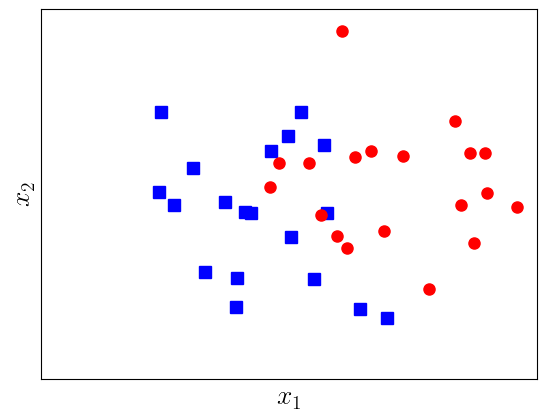

In [3]:
np.random.seed(22)

means = [[2, 2], [4, 2]]
cov = [[.7, 0], [0, .7]]
N = 20
X0 = np.random.multivariate_normal(means[0], cov, N) # each row is a data point 
X1 = np.random.multivariate_normal(means[1], cov, N)

plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)

# hide tikcs 
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.show()

In [4]:
X = np.concatenate((X0, X1), axis=0)
y = np.concatenate((np.ones(N), -np.ones(N)))

## Solving by using the Scikit-learn library

In [5]:
from sklearn.svm import SVC

C = 100
clf = SVC(kernel = 'linear', C = C) # `kernel` is the type of hyperplane
clf.fit(X, y) 

w_sklearn = clf.coef_.reshape(-1, 1)
b_sklearn = clf.intercept_[0]

In [8]:
print(f"w_sklearn = \n{w_sklearn}\n\nb_sklearn = {b_sklearn}")

w_sklearn = 
[[-1.87461946]
 [-1.80697358]]

b_sklearn = 8.496911901960104


## Solving by using dual problems

In [9]:
from cvxopt import matrix, solvers

V = np.concatenate((X0.T, -X1.T), axis=1) # V[n,:] = y[n]*X[n]
K = matrix(V.T.dot(V))
p = matrix(-np.ones((2 * N, 1)))
G = matrix(np.concatenate((-np.eye(2 * N), np.eye(2 * N)), axis=0))
h = matrix(np.concatenate((np.zeros((2 * N, 1)), C * np.ones((2 * N, 1))), axis=0))
A = matrix(y.reshape((-1, 2 * N)))
b = matrix(np.zeros((1, 1)))

solvers.options['show_progress'] = False
sol = solvers.qp(K, p, G, h, A, b)

l = np.array(sol['x'])
print('lambda = \n', l.T)

lambda = 
 [[1.11381472e-06 9.99999967e+01 1.10533113e-06 6.70163541e-06
  3.40838760e+01 4.73972851e-06 9.99999978e+01 3.13320447e-06
  9.99999985e+01 5.06729333e+01 9.99999929e+01 3.23564235e-06
  9.99999984e+01 9.99999948e+01 1.37977626e-06 9.99997155e+01
  3.45005660e-06 1.46190314e-06 5.50601997e-06 1.45062544e-06
  1.85373848e-06 1.14181647e-06 8.47565685e+01 9.99999966e+01
  9.99999971e+01 8.00764709e-07 2.65537194e-06 1.45230729e-06
  4.15737085e-06 9.99999887e+01 9.99999761e+01 8.98414771e-07
  9.99999979e+01 1.75651607e-06 8.27947897e-07 1.04289117e-06
  9.99999969e+01 9.07920760e-07 8.83138296e-07 9.99999971e+01]]


In the found lambda components, there are many components as small as `1e-6` or `1e-7`. These are `lambda_i = 0`. There are many elements around `9.99e+01`, these are `lambda_i` equal to `C = 100`, corresponding to support vectors not on the margins, small errors occur due to calculation. The remaining values ​​between $0$ and $100$ are values ​​corresponding to points exactly on the two margins.

Next, we need to calculate $\mathbf{w}$ and $b$ according to formulas $(15)$ and $(16)$. Before that, we need to find the set of support points and points on the margins.

In [13]:
S = np.where(l > 1e-5)[0] # support set 
S2 = np.where(l < .999*C)[0]

M = [val for val in S if val in S2] # intersection of two lists

XT = X.T # we need each column to be one data point in this alg
VS = V[:, S]
lS = l[S]
yM = y[M]
XM = XT[:, M]

w_dual = VS.dot(lS).reshape(-1, 1)
b_dual = np.mean(yM.T - w_dual.T.dot(XM))
print(w_dual.T, b_dual) 

[[-1.87457279 -1.80695039]] 8.496721098141274


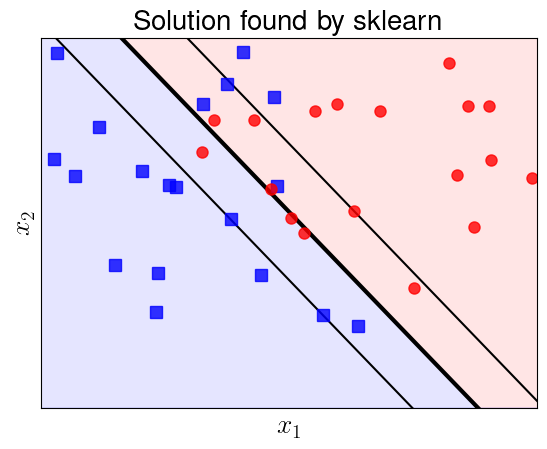

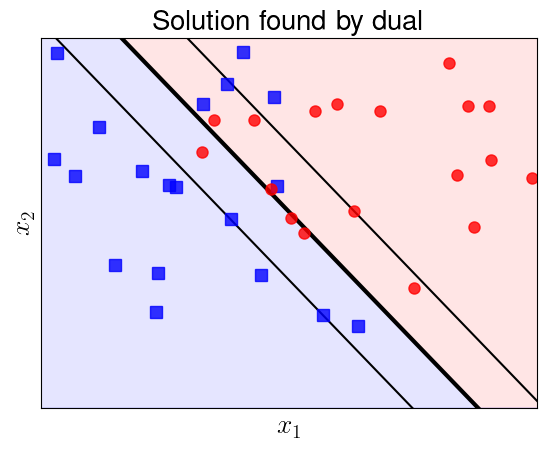

In [18]:
def myplot(X0, X1, w, b, tit):
    fig, ax = plt.subplots()

    w0 = w[0]
    w1 = w[1]
    x1 = np.arange(-10, 10, 0.1)
    y1 = -w0/w1*x1 - b/w1
    y2 = -w0/w1*x1 - (b-1)/w1
    y3 = -w0/w1*x1 - (b+1)/w1
    plt.plot(x1, y1, 'k', linewidth = 3)
    plt.plot(x1, y2, 'k')
    plt.plot(x1, y3, 'k')

    # equal axis and lim
    plt.axis('equal')
    plt.ylim(0, 3)
    plt.xlim(2, 4)

    # hide tikcs 
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])

    # fill two regions
    y4 = 10*x1
    plt.plot(x1, y1, 'k')
    plt.fill_between(x1, y1, color='blue', alpha=0.1)
    plt.fill_between(x1, y1, y4, color='red', alpha=0.1)

    plt.xlabel('$x_1$', fontsize = 20)
    plt.ylabel('$x_2$', fontsize = 20)
    plt.title('Solution found by ' + tit, fontsize = 20)

    plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
    plt.show()

myplot(X0, X1, w_sklearn, b_sklearn, 'sklearn')
myplot(X0, X1, w_dual, b_dual, 'dual')